#    Classification Ascendante Hiérarchique


In [1]:
# Importation des données
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importation des packs de CAH
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Importation des packs de KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Importer les données depuis le fichier CSV
df_pca_components = pd.read_csv('df_pca_components.csv')
# Remettre Zone en index 
df_pca_components.set_index('Zone', inplace=True)

df_poulet = pd.read_csv('df_poulet.csv')
df_poulet.set_index('Zone', inplace=True)

In [3]:
df_pca_components

,PC1,PC2,PC3,PC4
Zone,,,,
Afghanistan,-1.250609,1.514689,0.507755,-0.018399
Afrique du Sud,3.428707,0.760411,-0.353065,-1.308687
Albanie,-0.766461,-0.654081,-0.505280,0.750782
Algérie,-0.684307,1.113028,0.118298,0.057509
Allemagne,5.554292,-0.533732,3.401341,0.371717
...,...,...,...,...
Égypte,1.346244,2.045899,-0.491207,-0.309803
Émirats arabes unis,1.286942,-2.349297,1.131426,-1.929411
Équateur,-0.593858,0.348291,-0.266937,-0.088572


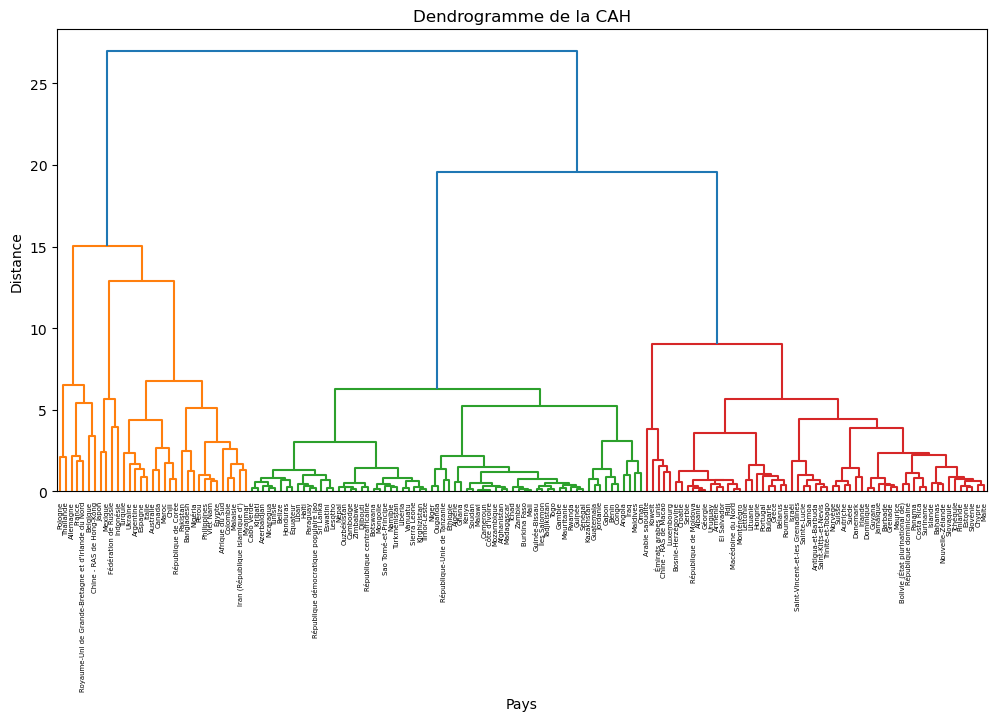

In [4]:
# distance entre pays avec linkage 

# Extraction des noms des pays à partir de l'index du DataFrame
pays = df_pca_components.index

# Calcul de la matrice de distance
Z = linkage(df_pca_components, method='ward', metric='euclidean') # 

# Tracé du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=pays)  # Affichage des noms des pays sur l'axe des abscisses
plt.xticks(rotation=90)  # Rotation des noms des pays à 90 degrés pour une meilleure lisibilité
plt.title('Dendrogramme de la CAH')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

In [40]:
# Utiliser AgglomerativeClustering pour déterminer les clusters
agg_clustering = AgglomerativeClustering(n_clusters=5)

In [41]:
# Appliquer l'algorithme sur mes données 
agg_clustering.fit(df_pca_components)

AgglomerativeClustering(n_clusters=5)

In [42]:
# Créer la colonne cluster
df_pca_components['cluster'] = agg_clustering.labels_
df_pca_components

,PC1,PC2,PC3,PC4,cluster
Zone,,,,,
Afghanistan,-1.250609,1.514689,0.507755,-0.018399,2
Afrique du Sud,3.428707,0.760411,-0.353065,-1.308687,1
Albanie,-0.766461,-0.654081,-0.505280,0.750782,0
Algérie,-0.684307,1.113028,0.118298,0.057509,2
Allemagne,5.554292,-0.533732,3.401341,0.371717,3
...,...,...,...,...,...
Égypte,1.346244,2.045899,-0.491207,-0.309803,1
Émirats arabes unis,1.286942,-2.349297,1.131426,-1.929411,0
Équateur,-0.593858,0.348291,-0.266937,-0.088572,2


In [43]:
# Comprendre le contenue des clusters
df_pca_components.groupby(['cluster']).mean()

,PC1,PC2,PC3,PC4
cluster,,,,
0,-0.171905,-1.264596,-0.380494,-0.051595
1,2.409420,1.052775,-0.776493,0.157962
2,-1.138035,0.907672,0.307233,-0.065993
3,4.054512,-1.091738,2.660887,1.362986
4,7.050252,1.959162,-0.987014,-1.452097


Text(95.72222222222221, 0.5, 'Clusters')

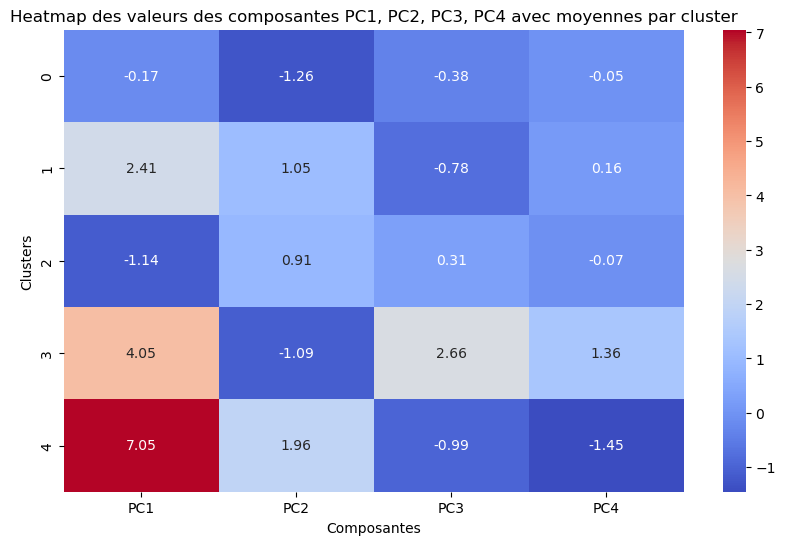

In [44]:
# Créez la heatmap pour les valeurs des composantes PC1, PC2, PC3, PC4 pour chaque cluster avec les moyennes
plt.figure(figsize=(10, 6))
sns.heatmap(df_pca_components.pivot_table(index='cluster'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des valeurs des composantes PC1, PC2, PC3, PC4 avec moyennes par cluster')
plt.xlabel('Composantes')
plt.ylabel('Clusters')

In [46]:
for i in range(5):
    cluster_name = df_pca_components['cluster'].unique()[i]
    print(f'cluster {cluster_name}:')
    print(df_pca_components[df_pca_components['cluster'] == cluster_name].index.tolist())
    print()

cluster 2:
['Afghanistan', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménistan', 'Vanuatu', 'Zambie', 'Zimbabwe', 'Équateur', 'Éthiopie', 'Îles Salomon']

cluster 1:
['Afrique du Sud', 'Argentine', 'Canada', 'Colombie', 'Espagne', 'Indonésie

In [47]:
# Créer une liste des zones appartenant au cluster 0
zones_cluster_0 = df_pca_components[df_pca_components['cluster'] == 0].index.tolist()

# Filtrer df_poulet avec les zones du cluster 2
df_poulet_cluster_0 = df_poulet.loc[zones_cluster_0]

In [48]:
# Trier les pays du cluster 2 par importation et population en ordre décroissant
df_poulet_cluster_0 = df_poulet_cluster_0.sort_values(
    by=['PIB/Habitant', 'Importations - Quantité', 'Population'],
    ascending=[False,False, False])

# Afficher le top 5
df_poulet_cluster_0.head(5)

,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant,cluster
Zone,,,,,,,,,
Chine - RAS de Macao,3000000.0,23000000.0,0.0,19000000.0,34.47,622585.0,1.590801,122978.0,1
Luxembourg,0.0,11000000.0,1000000.0,11000000.0,18.33,591910.0,2.183115,114986.0,1
Irlande,110000000.0,99000000.0,93000000.0,128000000.0,25.82,4753279.0,1.224504,77749.2,1
Émirats arabes unis,48000000.0,433000000.0,94000000.0,412000000.0,43.47,9487203.0,1.348395,71182.4,1
Suisse,91000000.0,51000000.0,4000000.0,133000000.0,15.72,8455804.0,0.905582,69103.6,1


In [49]:
# Créer la colonne cluster
df_poulet['cluster'] = agg_clustering.labels_
df_poulet

,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant,cluster
Zone,,,,,,,,,
Afghanistan,2.800000e+07,29000000.0,0.0,5.700000e+07,1.53,36296113.0,2.580562,2096.1,2
Afrique du Sud,1.667000e+09,514000000.0,63000000.0,2.118000e+09,35.69,57009756.0,1.427048,13950.5,1
Albanie,1.300000e+07,38000000.0,0.0,4.700000e+07,16.36,2884169.0,-0.078609,12771.0,0
Algérie,2.750000e+08,2000000.0,0.0,2.770000e+08,6.38,41389189.0,2.066013,11809.5,2
Allemagne,1.514000e+09,842000000.0,646000000.0,1.739000e+09,19.47,82658409.0,0.565300,53071.5,3
...,...,...,...,...,...,...,...,...,...
Égypte,1.118000e+09,110000000.0,1000000.0,1.250000e+09,12.96,96442591.0,2.112843,10435.9,1
Émirats arabes unis,4.800000e+07,433000000.0,94000000.0,4.120000e+08,43.47,9487203.0,1.348395,71182.4,0
Équateur,3.400000e+08,0.0,0.0,3.410000e+08,19.31,16785361.0,1.784264,11679.4,2


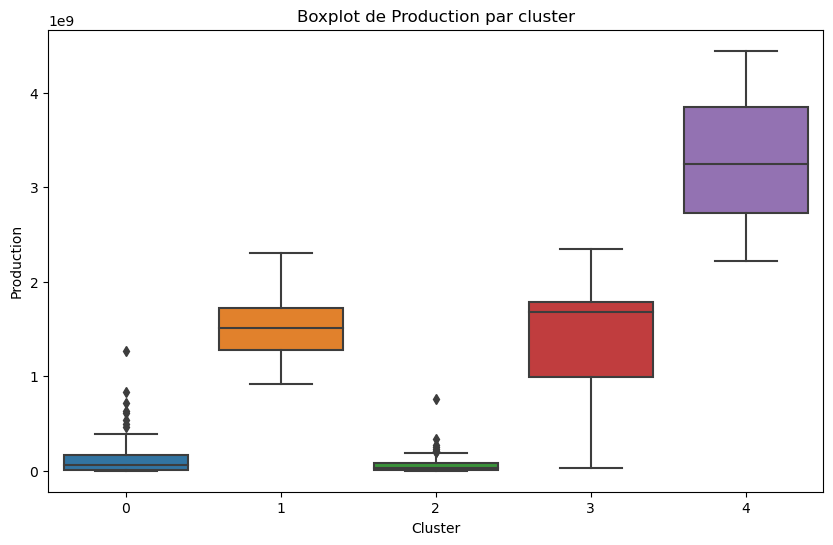

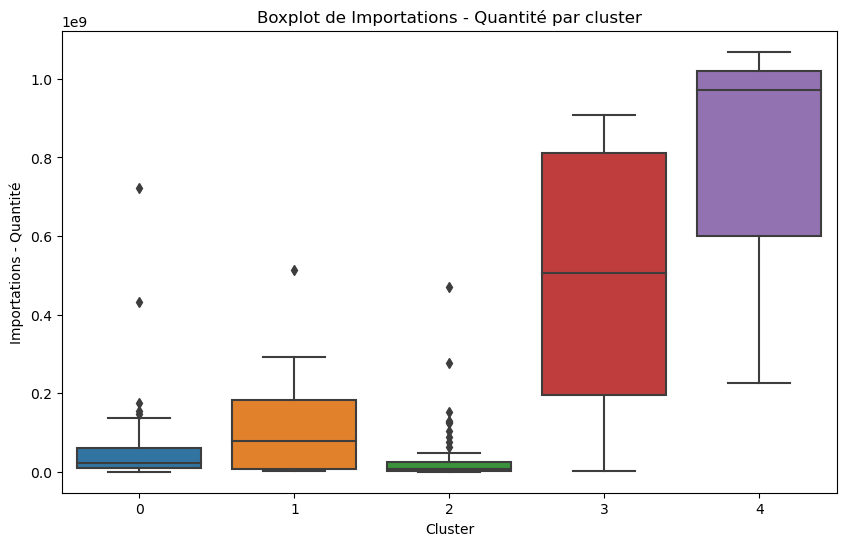

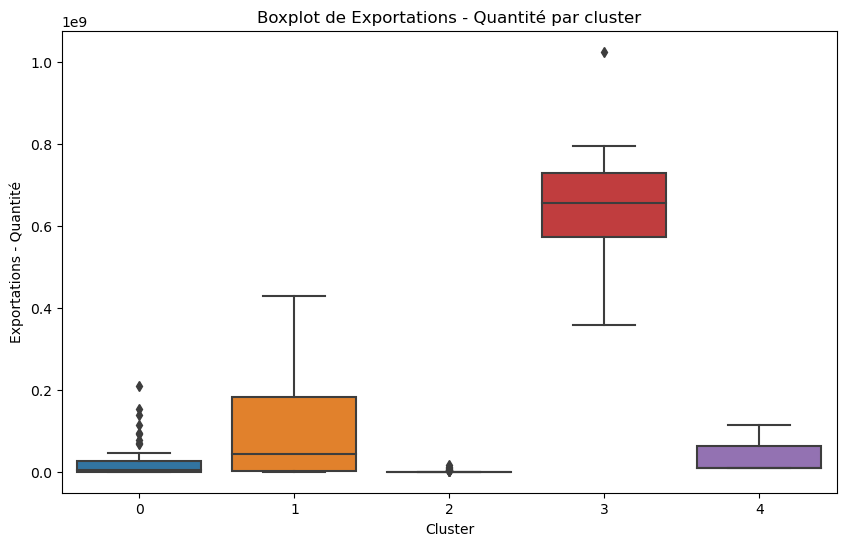

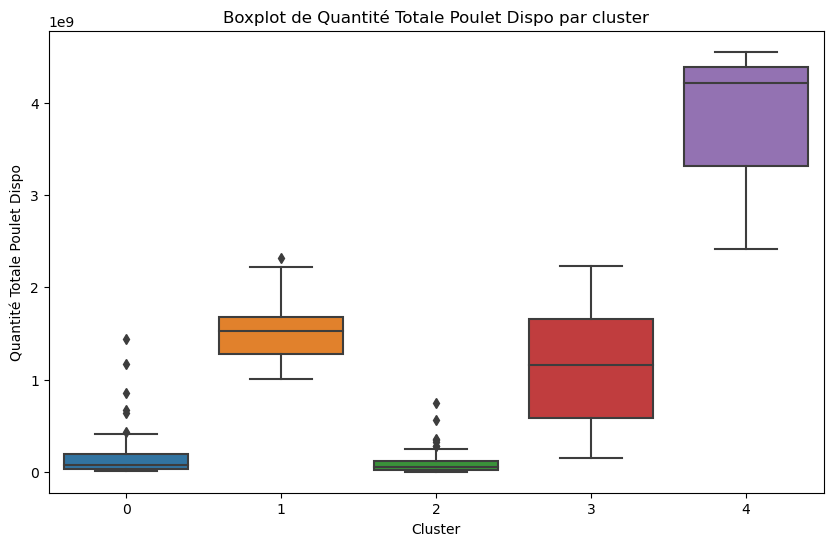

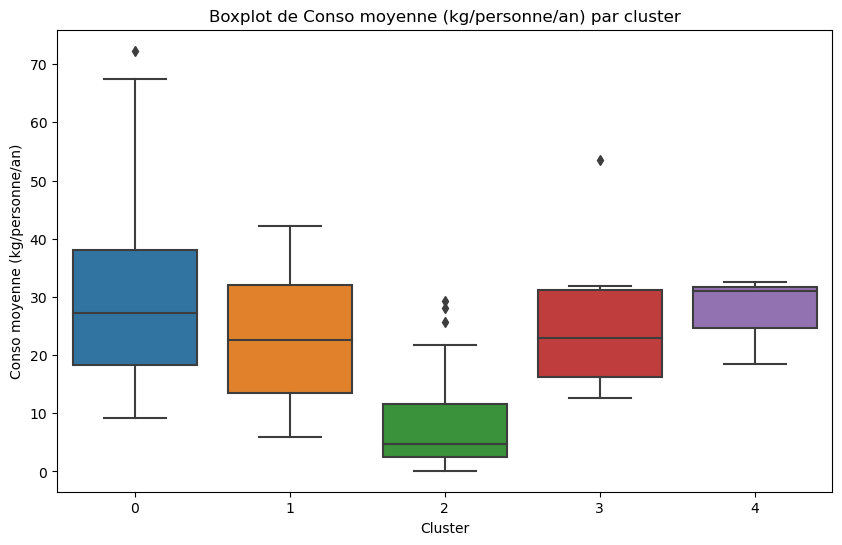

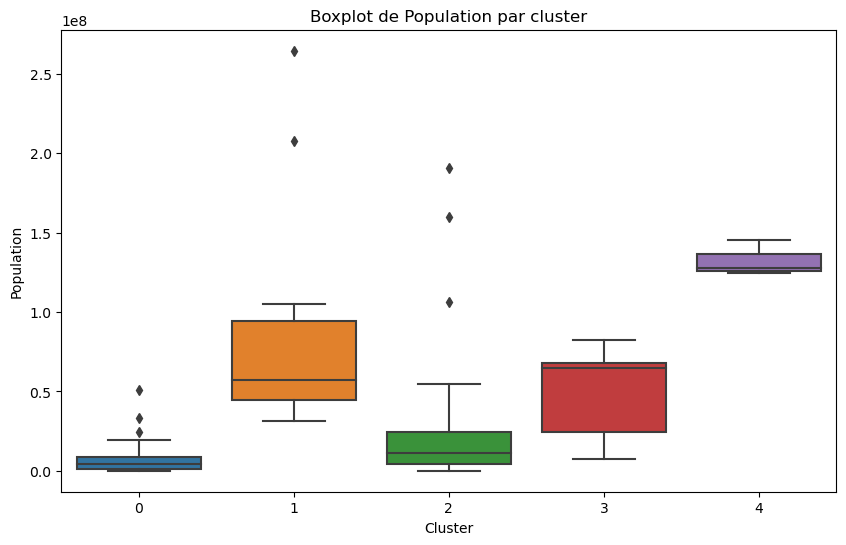

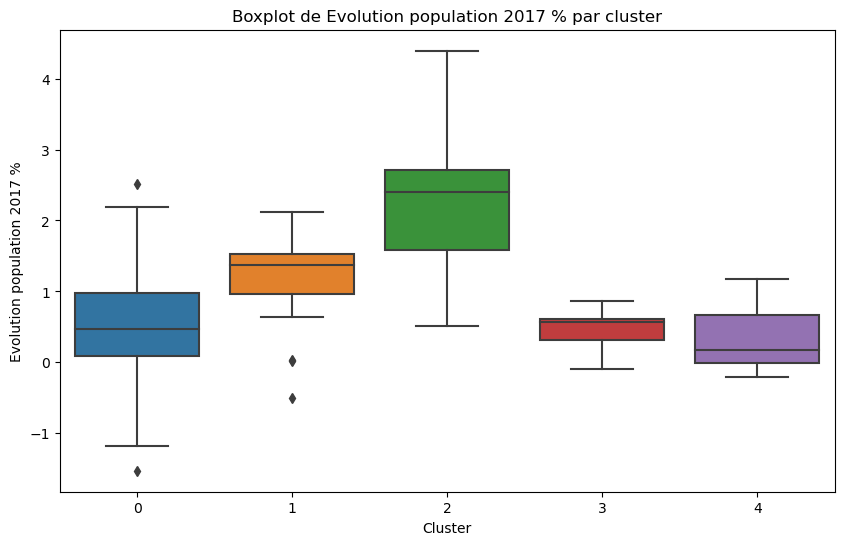

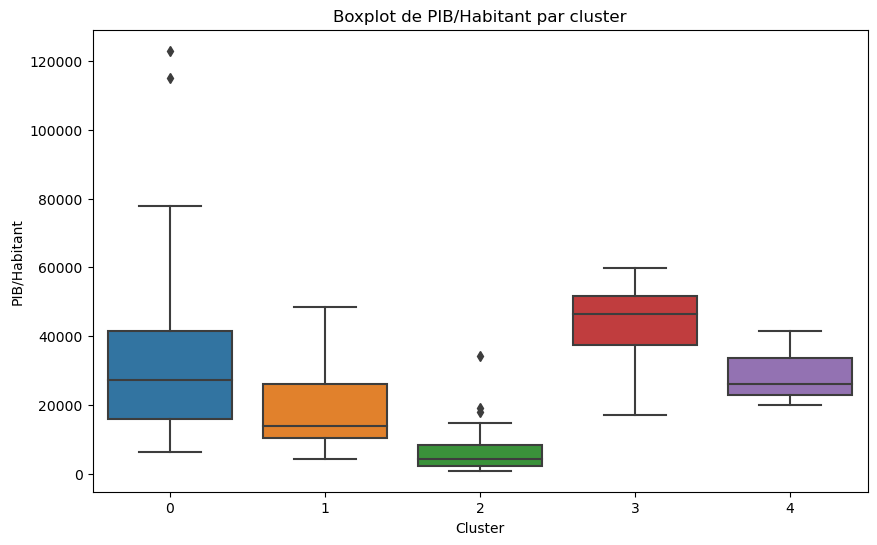

In [50]:
# Afficher les boxplots pour chaque variable en fonction du cluster
variables = ['Production', 'Importations - Quantité', 'Exportations - Quantité', 'Quantité Totale Poulet Dispo', 'Conso moyenne (kg/personne/an)', 'Population', 'Evolution population 2017 %', 'PIB/Habitant']
for variable in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=variable, data=df_poulet)
    plt.title(f'Boxplot de {variable} par cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.show()

# Kmeans 

In [16]:
# Définir X
X = df_pca_components[['PC1', 'PC2', 'PC3', 'PC4']]
X

,PC1,PC2,PC3,PC4
Zone,,,,
Afghanistan,-1.250609,1.514689,0.507755,-0.018399
Afrique du Sud,3.428707,0.760411,-0.353065,-1.308687
Albanie,-0.766461,-0.654081,-0.505280,0.750782
Algérie,-0.684307,1.113028,0.118298,0.057509
Allemagne,5.554292,-0.533732,3.401341,0.371717
...,...,...,...,...
Égypte,1.346244,2.045899,-0.491207,-0.309803
Émirats arabes unis,1.286942,-2.349297,1.131426,-1.929411
Équateur,-0.593858,0.348291,-0.266937,-0.088572


In [18]:
# Identifier le nombre de clusters optimal
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

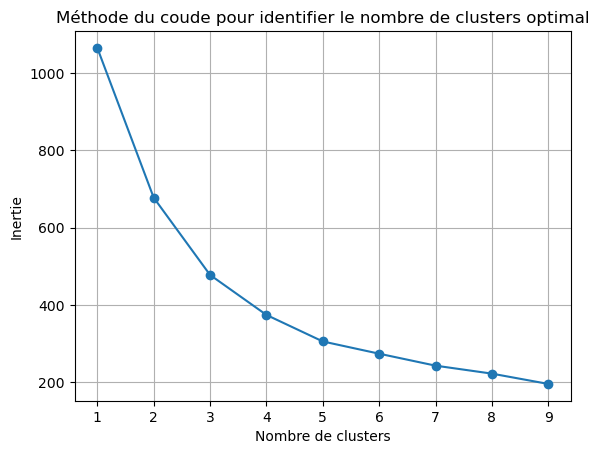

In [19]:
# Tracer le graphique d'inertie en fonction du nombre de clusters
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour identifier le nombre de clusters optimal')
plt.grid(True)
plt.show()



In [ ]:
Le coude se casse au 5éme cluster

In [51]:
# Appliquer KMeans pour 3 clusters
model = KMeans(n_clusters=5)
model.fit(X)

C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\33621\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [52]:
# Récupérer les labels des clusters
labels = model.labels_

In [53]:
# Ajouter la colonne 'cluster'
df_pca_components['cluster'] = labels

In [1]:
labels

NameError: name 'labels' is not defined

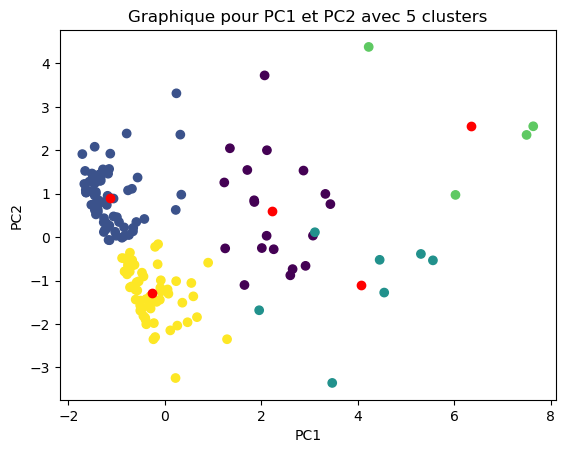

In [65]:
# Afficher les deux premières composantes principales avec les centroides
plt.scatter(X['PC1'], X['PC2'], c=labels) # nuage de points avec les valeurs PC1 et PC2
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='r') # Centroides avec les coordonnées de model.cluster_centers
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Graphique pour PC1 et PC2 avec 5 clusters')
plt.show()

In [55]:
# Créer un dataframe à partir des centres de clusters
cluster_centers_df = pd.DataFrame(model.cluster_centers_, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [56]:
# Définir l'étiquette des clusters
cluster_labels = [f'Cluster {i}' for i in range(len(cluster_centers_df))]

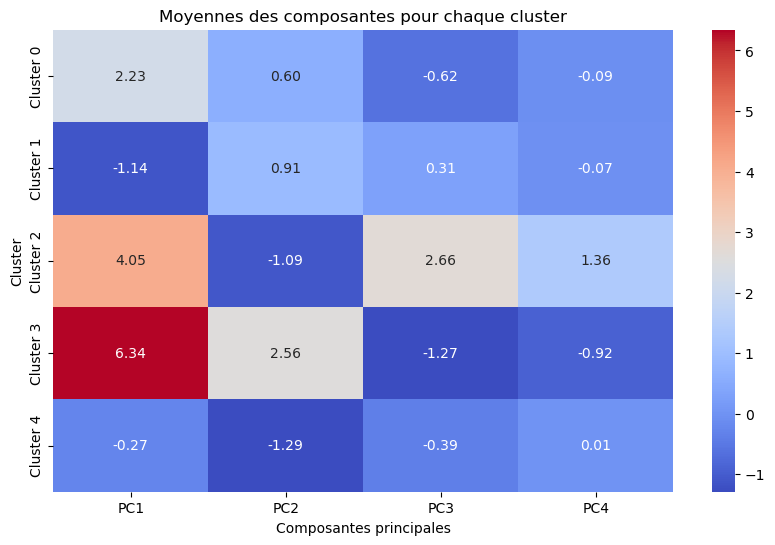

In [58]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df, annot=True, cmap='coolwarm', fmt=".2f", yticklabels=cluster_labels)
plt.title('Moyennes des composantes pour chaque cluster')
plt.xlabel('Composantes principales')
plt.ylabel('Cluster')
plt.show()

In [57]:
cluster_centers_df

,PC1,PC2,PC3,PC4
0,2.225187,0.601228,-0.615391,-0.092634
1,-1.138035,0.907672,0.307233,-0.065993
2,4.054512,-1.091738,2.660887,1.362986
3,6.343430,2.563945,-1.265579,-0.921248
4,-0.272857,-1.292899,-0.389629,0.008727


In [59]:
# Afficher les noms de pays dans chaque cluster
cluster_countries = [[] for _ in range(max(labels) + 1)]
for i, label in enumerate(labels):
    country = df_pca_components.index[i]
    cluster_countries[label].append(country)

for cluster, countries in enumerate(cluster_countries):
    print(f"Cluster {cluster}:")
    print(countries) 

Cluster 0:
['Afrique du Sud', 'Arabie saoudite', 'Argentine', 'Australie', 'Canada', 'Colombie', 'Espagne', "Iran (République islamique d')", 'Italie', 'Malaisie', 'Myanmar', 'Pakistan', 'Philippines', 'Pérou', 'République de Corée', 'Turquie', 'Ukraine', 'Viet Nam', 'Égypte']
Cluster 1:
['Afghanistan', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Botswana', 'Burkina Faso', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Rwanda', 'République centrafricaine', 'République démocratique populaire lao', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierr

In [61]:
# Créer une liste des zones appartenant au cluster 4
zones_cluster_4 = df_pca_components[df_pca_components['cluster'] == 4].index.tolist()

# Filtrer df_poulet avec les zones du cluster 4
df_poulet_cluster_4 = df_poulet.loc[zones_cluster_0]

In [63]:
# Trier les pays du cluster 4 par importation et population en ordre décroissant
df_poulet_cluster_4 = df_poulet_cluster_4.sort_values(
    by=['PIB/Habitant','Importations - Quantité', 'Population'],
    ascending=[False,False, False])

# Afficher le top5
df_poulet_cluster_4.head(5)

,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant,cluster
Zone,,,,,,,,,
Chine - RAS de Macao,3000000.0,23000000.0,0.0,19000000.0,34.47,622585.0,1.590801,122978.0,0
Luxembourg,0.0,11000000.0,1000000.0,11000000.0,18.33,591910.0,2.183115,114986.0,0
Irlande,110000000.0,99000000.0,93000000.0,128000000.0,25.82,4753279.0,1.224504,77749.2,0
Émirats arabes unis,48000000.0,433000000.0,94000000.0,412000000.0,43.47,9487203.0,1.348395,71182.4,0
Suisse,91000000.0,51000000.0,4000000.0,133000000.0,15.72,8455804.0,0.905582,69103.6,0


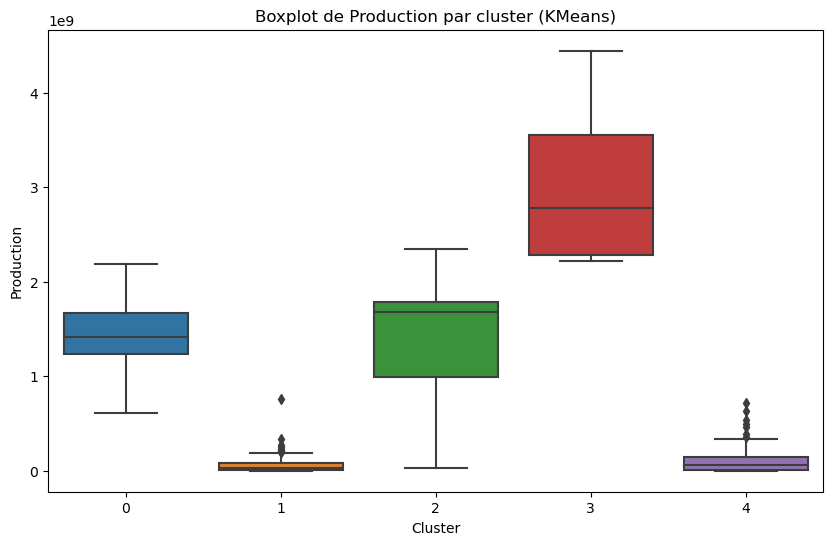

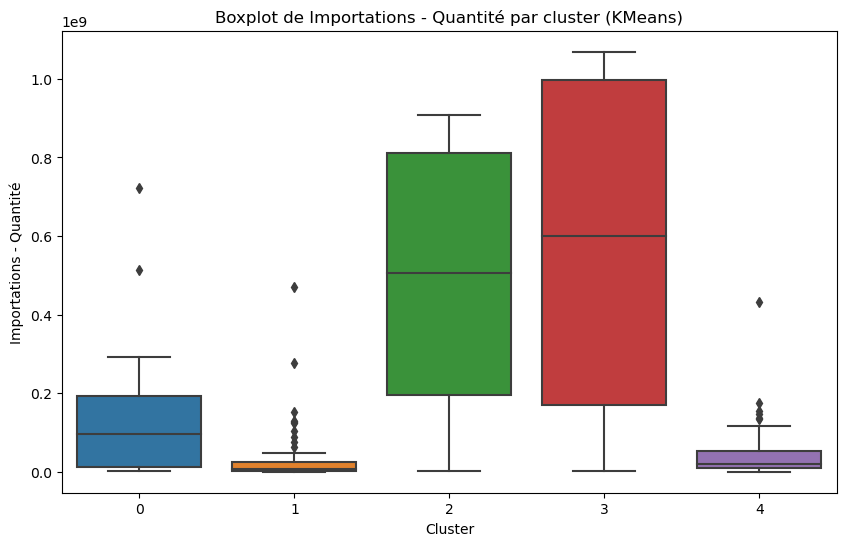

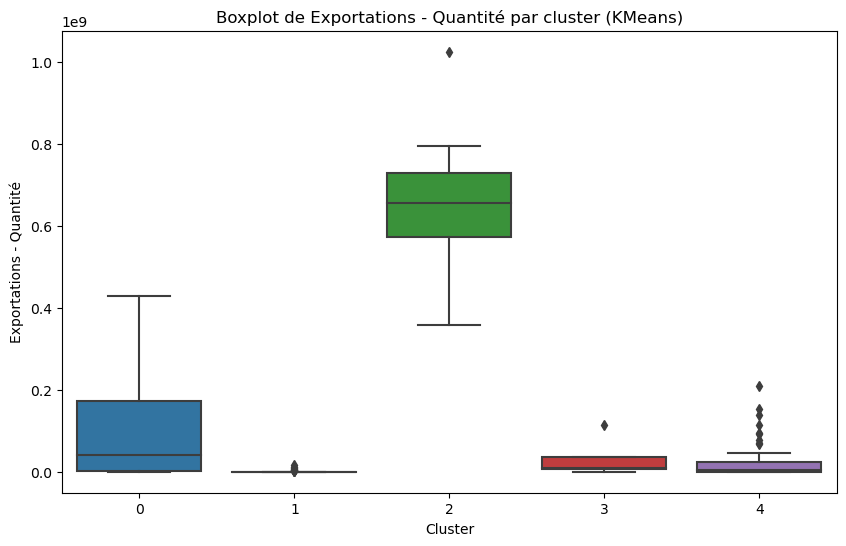

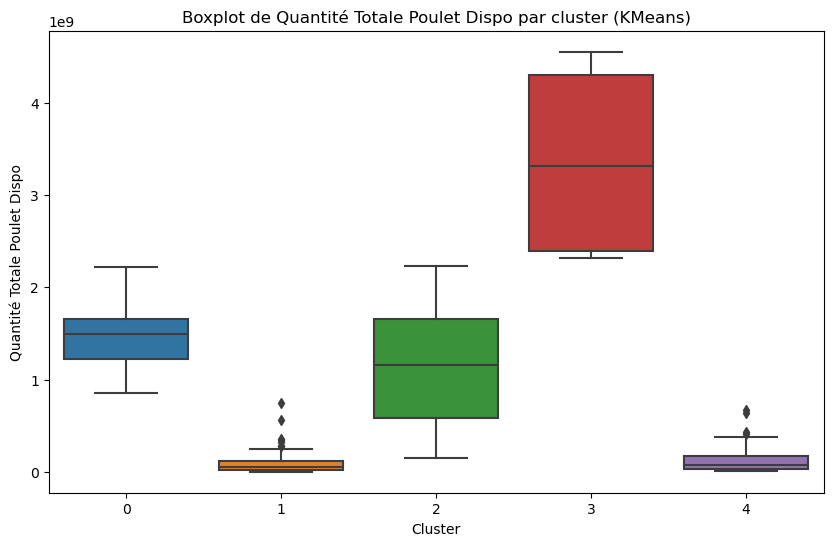

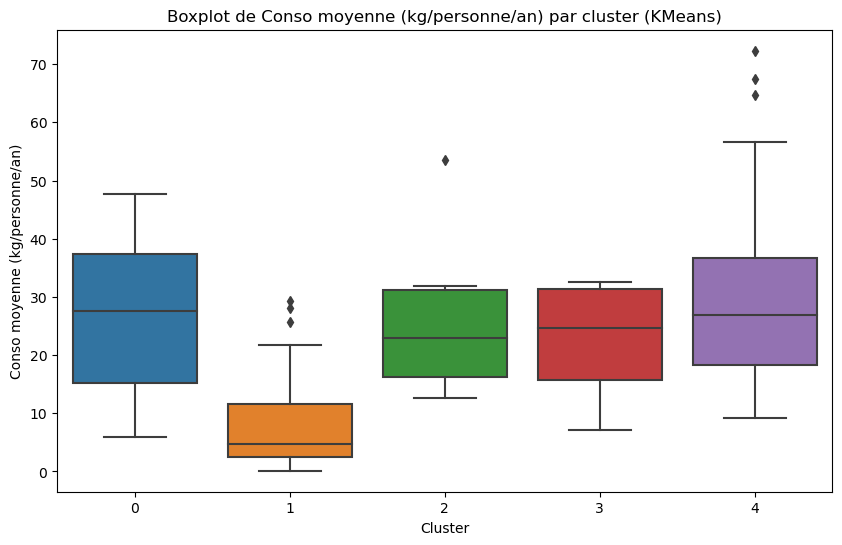

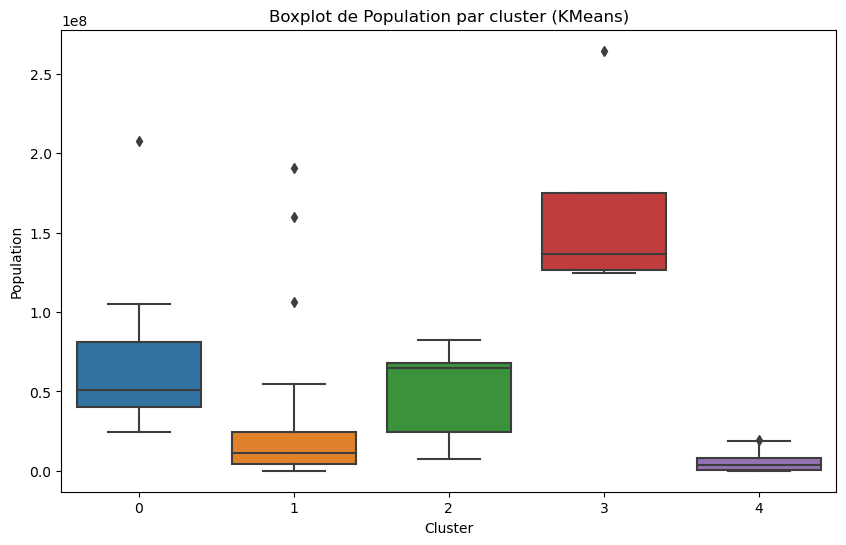

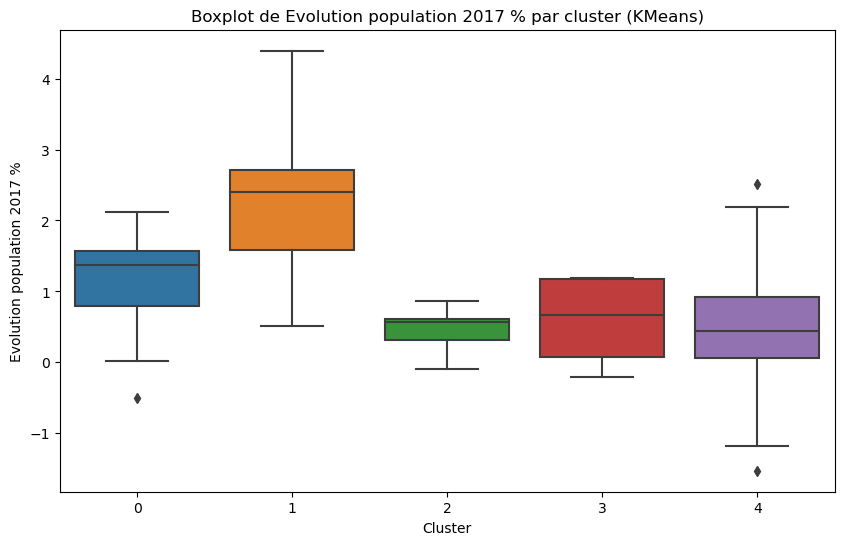

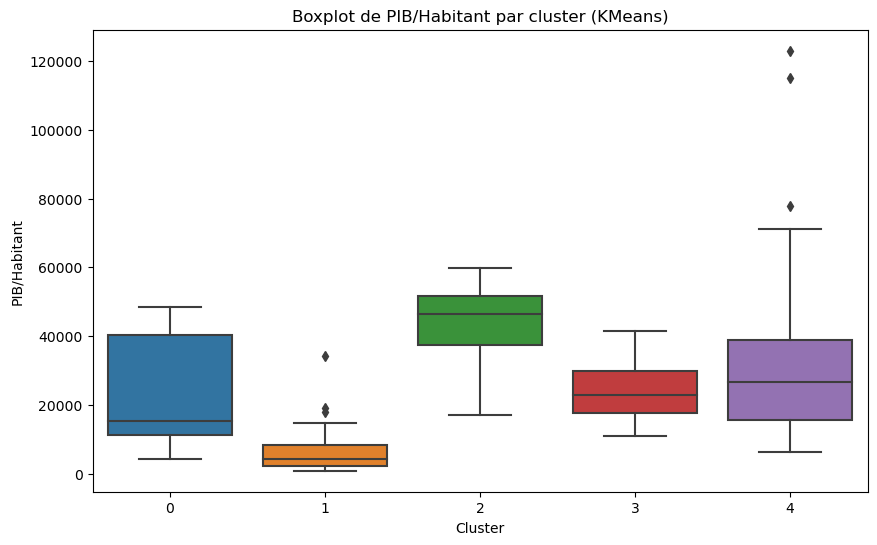

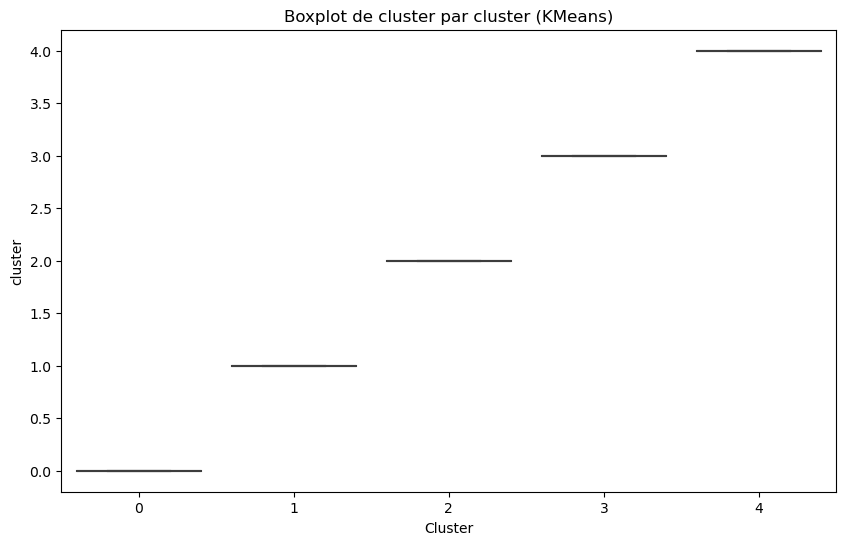

In [64]:
# Ajouter la colonne 'cluster'
df_poulet['cluster'] = labels

# Afficher les boxplots pour chaque variable en fonction du cluster
for variable in df_poulet.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=variable, data=df_poulet)
    plt.title(f'Boxplot de {variable} par cluster (KMeans)')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.show()
